In [266]:
# Importamos las librerías necesarias para nuestro código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [267]:
# Leemos el archivo "Leon.txt" con la siguiente función para empezar a trabajar.
df0 = pd.read_csv('Leon.txt', skiprows=20, sep='\s+',skipfooter=1,engine='python',names=('Fecha','Precip','Evap','Tmax','Tmin'))

In [268]:
# Imprimimos los primeros renglones de la tabla para asegurarnos de que se haya leído correctamente.
df0.head()

,Fecha,Precip,Evap,Tmax,Tmin
0,01/01/1961,0.0,3.7,25,9
1,02/01/1961,0.0,4.7,25.5,8.5
2,03/01/1961,0.0,5.4,25,6
3,04/01/1961,0.0,4,24,6
4,05/01/1961,0.0,2.8,24.5,6


In [269]:
df = pd.DataFrame(df0)

In [270]:
# Remplazamos la palabra "Nulo" del archivo de texto por "NaN" para que python pueda leerlo como dato nulo.
df = df.replace('Nulo','NaN')

In [271]:
# Cambiamos los tipos de datos para poder empezar a trabajar con ellos de manera correcta y para que python los reconozca.
# Además cambiamos el tipo de dato de la fecha para que lo reconozca como fecha.
df['Fecha'] = pd.to_datetime(df.apply(lambda x: x['Fecha'], 1), dayfirst=True)
df['Precip'] = df['Precip'].astype(float)
df['Evap'] = df['Evap'].astype(float)
df['Tmax'] = df['Tmax'].astype(float)
df['Tmin'] = df['Tmin'].astype(float)

In [272]:
# Imprimimos los tipos de datos para asegurarnos de que todo va bien.
df.dtypes

Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
dtype: object

Text(0, 0.5, 'Fecha (Mes)')

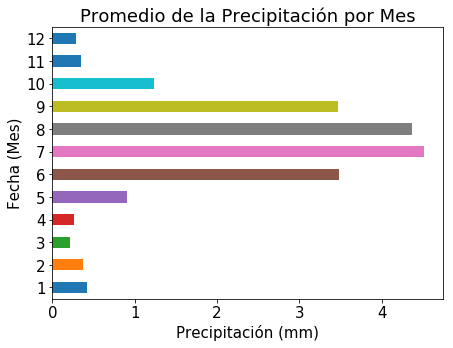

In [273]:
# Agrupamos la fecha y la columna de precipitación para así poder graficar el promedio de la precipitación en cada mes.
fig = plt.figure(figsize=(7,5))

df.groupby(df['Fecha'].dt.month)['Precip'].mean().plot(kind = 'barh')
plt.xlabel('Precipitación (mm)')
plt.legend
plt.title('Promedio de la Precipitación por Mes')
plt.ylabel('Fecha (Mes)')

Text(0.5, 1.0, 'Suma de la precipitación por mes a lo largo de los años')

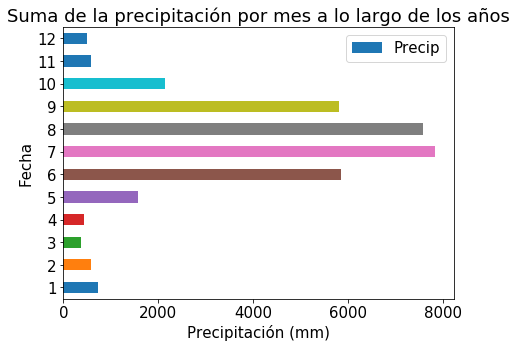

In [274]:
# Ahora graficamos la suma de la precipitación a lo largo de todos los años de cada mes.
fig = plt.figure(figsize=(7,5))

df.groupby(df['Fecha'].dt.month)['Precip'].sum().plot(kind = 'barh', legend = 'Reverse')
plt.xlabel('Precipitación (mm)')
plt.legend
plt.title('Suma de la precipitación por mes a lo largo de los años')

Text(0.5, 0, 'Fecha (Mes)')

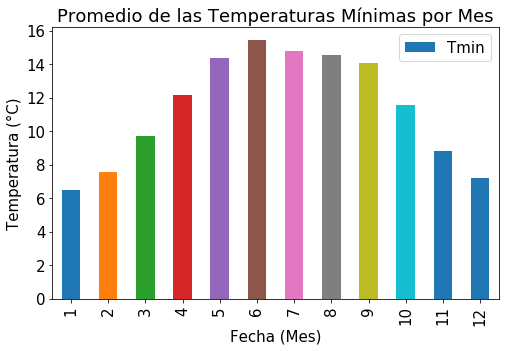

In [275]:
fig = plt.figure(figsize=(8,5))

df.groupby(df['Fecha'].dt.month)['Tmin'].mean().plot(kind = 'bar', legend = 'Reverse')
plt.title('Promedio de las Temperaturas Mínimas por Mes')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Fecha (Mes)')

Text(0.5, 0, 'Fecha (Mes)')

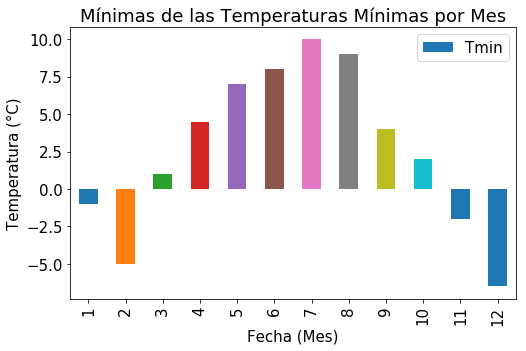

In [276]:
fig = plt.figure(figsize=(8,5))

df.groupby(df['Fecha'].dt.month)['Tmin'].min().plot(kind = 'bar', legend = 'Reverse')
plt.title('Mínimas de las Temperaturas Mínimas por Mes')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Fecha (Mes)')

Text(0.5, 0, 'Fecha (Mes)')

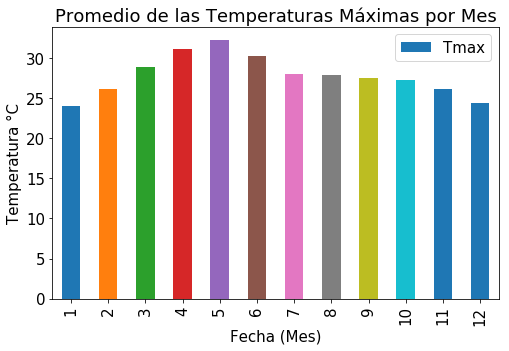

In [277]:
fig = plt.figure(figsize=(8,5))

df.groupby(df['Fecha'].dt.month)['Tmax'].mean().plot(kind = 'bar', legend = 'Reverse')
plt.title('Promedio de las Temperaturas Máximas por Mes')
plt.ylabel('Temperatura °C')
plt.xlabel('Fecha (Mes)')

Text(0.5, 0, 'Fecha (Año)')

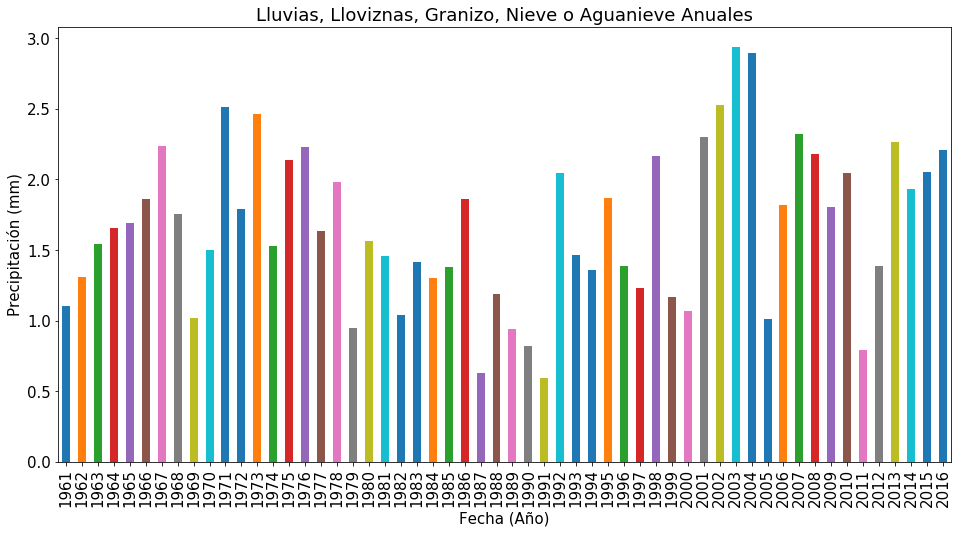

In [278]:
fig = plt.figure(figsize=(16,8))
df.groupby(df['Fecha'].dt.year)['Precip'].mean().plot(kind = 'bar')
plt.legend
plt.ylabel('Precipitación (mm)')
plt.title('Lluvias, Lloviznas, Granizo, Nieve o Aguanieve Anuales')
plt.xlabel('Fecha (Año)')

Text(0.5, 0, 'Fecha (Mes)')

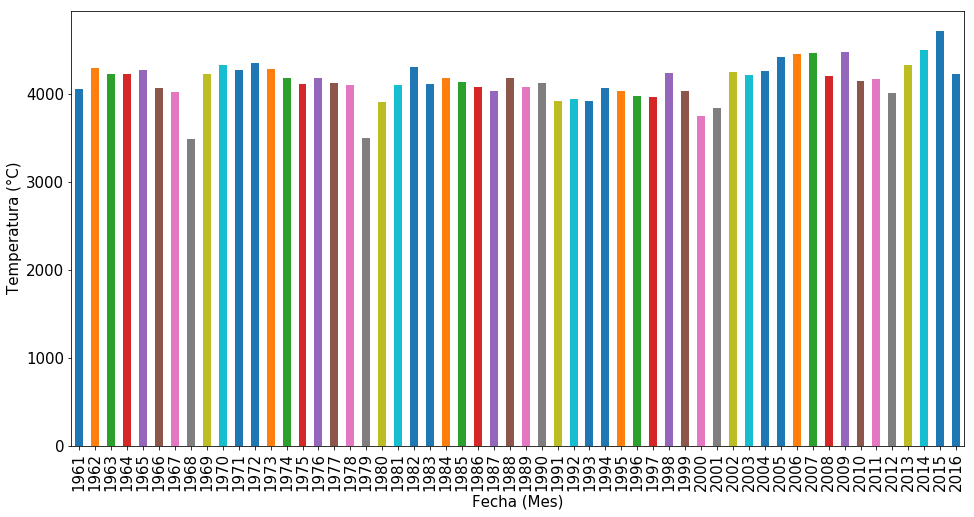

In [279]:
fig = plt.figure(figsize=(16,8))
df.groupby(df['Fecha'].dt.year)['Tmin'].sum().plot(kind = 'bar')
plt.legend
plt.ylabel('Temperatura (°C)')
plt.xlabel('Fecha (Mes)')

In [301]:
df1 = df0

In [302]:
df1['Fecha'] = pd.to_datetime(df['Fecha'])

In [303]:
mask = (df1['Fecha'] > '1997-1-1') & (df1['Fecha'] <= '2016-12-31')

In [304]:
df1 = df1.loc[mask]

In [305]:
# Remplazamos la palabra "Nulo" del archivo de texto por "NaN" para que python pueda leerlo como dato nulo.
df1 = df1.replace('Nulo','NaN')

In [306]:
df1['Precip'] = df1['Precip'].astype(float)
df1['Evap'] = df1['Evap'].astype(float)
df1['Tmax'] = df1['Tmax'].astype(float)
df1['Tmin'] = df1['Tmin'].astype(float)

In [307]:
df1.dtypes

Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
dtype: object

In [308]:
df1.tail()

,Fecha,Precip,Evap,Tmax,Tmin
20411,2016-11-26,0.0,3.7,25.5,7.0
20412,2016-11-27,0.0,2.0,25.0,6.5
20413,2016-11-28,0.0,2.4,25.5,7.0
20414,2016-11-29,0.0,2.1,25.0,8.0
20415,2016-11-30,0.0,3.6,25.0,8.5


Text(0.5, 0, 'Fecha (Mes)')

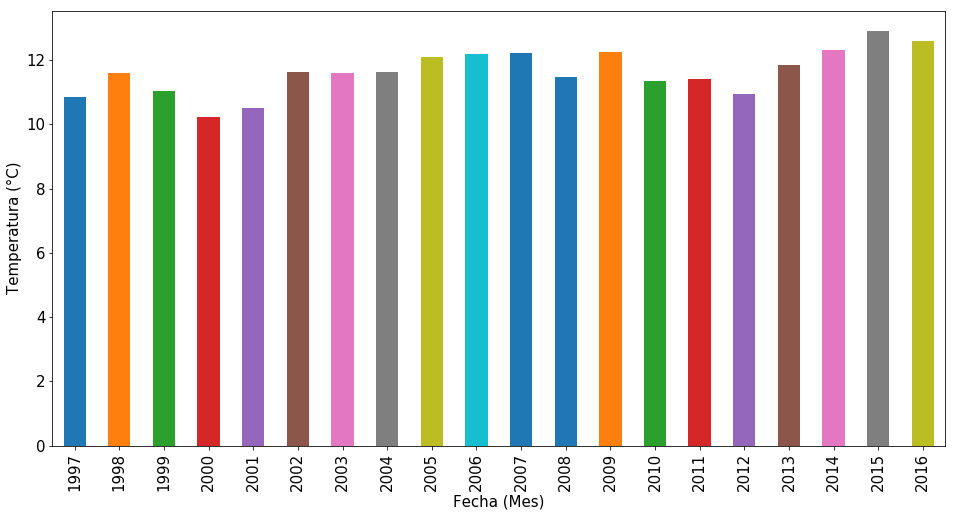

In [309]:
fig = plt.figure(figsize=(16,8))
df1.groupby(df1['Fecha'].dt.year)['Tmin'].mean().plot(kind = 'bar')
plt.legend
plt.ylabel('Temperatura (°C)')
plt.xlabel('Fecha (Mes)')

Text(0.5, 1.0, '')

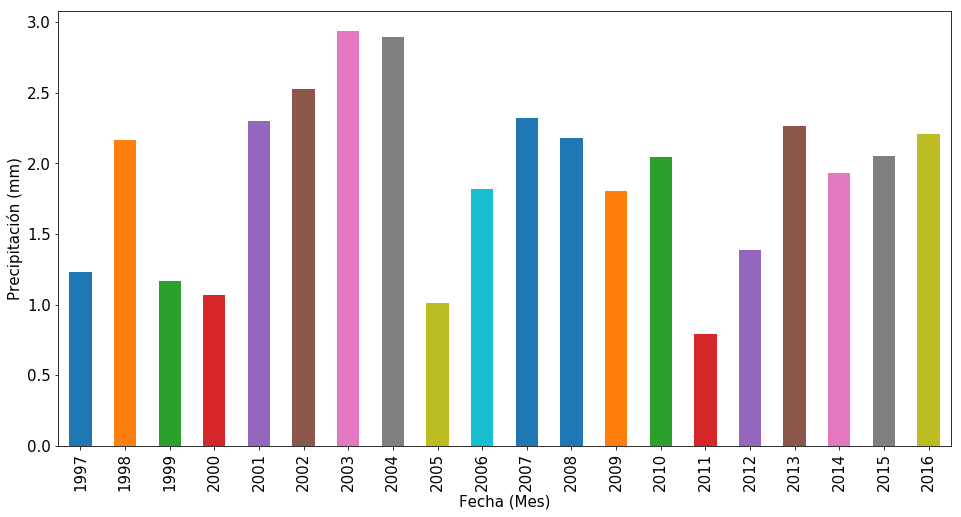

In [310]:
fig = plt.figure(figsize=(16,8))
df1.groupby(df1['Fecha'].dt.year)['Precip'].mean().plot(kind = 'bar')
plt.legend
plt.ylabel('Precipitación (mm)')
plt.xlabel('Fecha (Mes)')
plt.title('')

Text(0.5, 0, 'Fecha (Mes)')

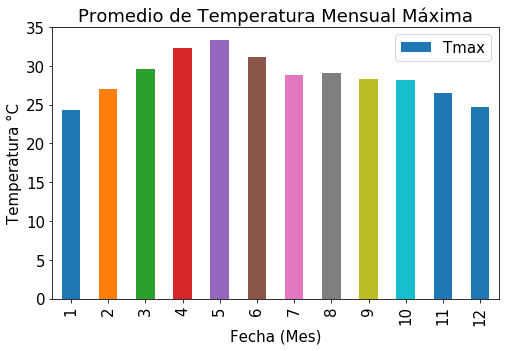

In [318]:
fig = plt.figure(figsize=(8,5))

df1.groupby(df1['Fecha'].dt.month)['Tmax'].mean().plot(kind = 'bar', legend = 'Reverse')
plt.title('Promedio de Temperatura Mensual Máxima')
plt.ylabel('Temperatura °C')
plt.xlabel('Fecha (Mes)')

Text(0.5, 0, 'Fecha (Mes)')

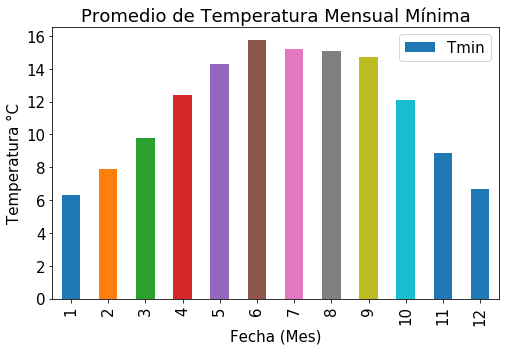

In [323]:
fig = plt.figure(figsize=(8,5))

df1.groupby(df1['Fecha'].dt.month)['Tmin'].mean().plot(kind = 'bar', legend = 'Reverse')
plt.title('Promedio de Temperatura Mensual Mínima')
plt.ylabel('Temperatura °C')
plt.xlabel('Fecha (Mes)')

In [321]:
df1.head()

,Fecha,Precip,Evap,Tmax,Tmin
13143,1997-01-02,0.0,3.7,27.0,7.0
13144,1997-01-03,0.0,2.2,27.0,7.0
13145,1997-01-04,0.0,4.2,26.5,9.0
13146,1997-01-05,0.0,4.7,27.5,6.5
13147,1997-01-06,0.0,5.2,27.0,6.5
